In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load independent variables
X = pd.read_csv("logisticX.csv").values

# Load dependent variable
y = pd.read_csv("logisticY.csv").values.flatten()


In [38]:
# Normalize the independent variables
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Add intercept term to X
X = np.hstack((np.ones((X.shape[0], 1)), X))



In [39]:
# Step 2: Implement logistic regression with batch gradient descent
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    costs = []
    for _ in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = (1 / m) * np.dot(X.T, (h - y))
        theta -= learning_rate * gradient
        cost = cost_function(X, y, theta)
        costs.append(cost)
    return theta, costs



In [40]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (99, 3)
Shape of y: (99,)


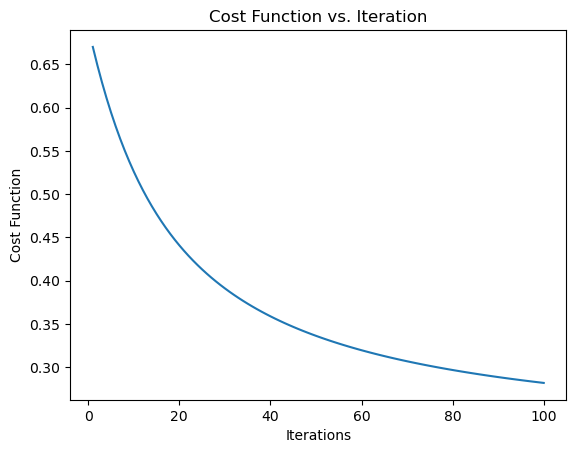

In [41]:
# Step 3: Train the model and plot cost function versus iteration curves
learning_rate = 0.1
iterations = 100

initial_theta = np.zeros(X.shape[1])
theta, costs = gradient_descent(X, y, initial_theta, learning_rate, iterations)

plt.plot(range(1, iterations + 1), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function vs. Iteration')
plt.show()



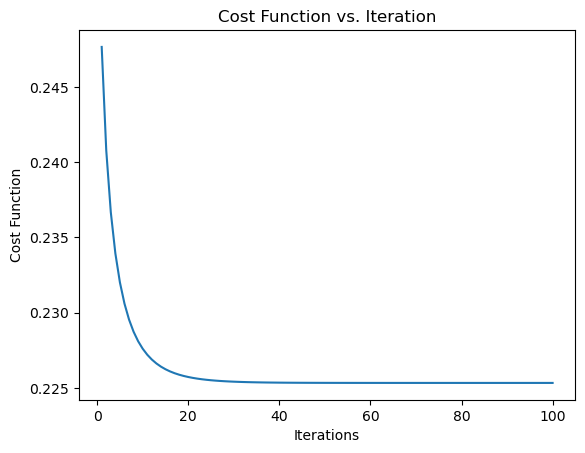

In [44]:
learning_rate = 5
iterations = 100

initial_theta = np.zeros(X.shape[1])
theta, costs = gradient_descent(X, y, initial_theta, learning_rate, iterations)

plt.plot(range(1, iterations + 1), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function vs. Iteration')
plt.show()

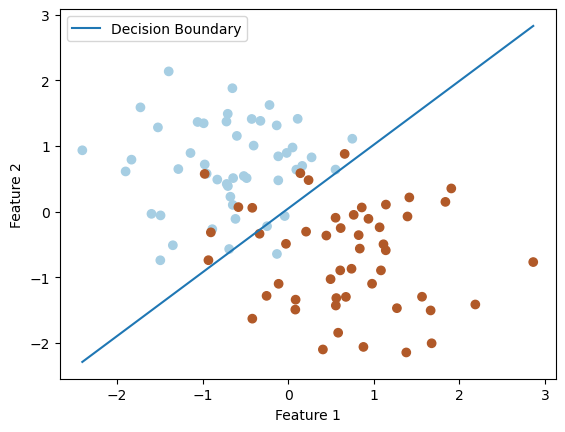

In [42]:
# Step 4: Plot the decision boundary along with the dataset
plt.figure()
plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

x_values = [np.min(X[:, 1]), np.max(X[:, 1])]
y_values = - (theta[0] + np.dot(theta[1], x_values)) / theta[2]
plt.plot(x_values, y_values, label='Decision Boundary')

plt.legend()
plt.show()



In [43]:
# Step 5: Calculate confusion matrix and performance metrics
predicted = np.round(sigmoid(np.dot(X, theta)))
confusion_matrix = np.zeros((2, 2))
for i in range(2):
    for j in range(2):
        confusion_matrix[i, j] = np.sum((predicted == i) & (y == j))

true_positives = confusion_matrix[1, 1]
false_positives = confusion_matrix[1, 0]
true_negatives = confusion_matrix[0, 0]
false_negatives = confusion_matrix[0, 1]

accuracy = (true_positives + true_negatives) / np.sum(confusion_matrix)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Confusion Matrix:")
print(confusion_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Confusion Matrix:
[[46.  8.]
 [ 3. 42.]]
Accuracy: 0.8888888888888888
Precision: 0.9333333333333333
Recall: 0.84
F1 Score: 0.8842105263157894
